# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [35]:
# Details Student 1:
# Daniel Shapira 208310607 danielshapira3@gmail.com
# Details Student 2:
# Daniel Papkov 211516232 papkovdaniel1@gmail.com

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [36]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [37]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [38]:
# word net installation:

# unmark if you want to use and need to install
# pip install wn
# python -m wn download omw-he:1.4

In [39]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [40]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# pip install hebrew_tokenizer

In [41]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [42]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [43]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [44]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

#### This code segment processes a dataset of stories in various languages and extracts the Hebrew stories. It identifies Hebrew words by checking their type and then reconstructs each story in Hebrew format. The resulting collection of Hebrew stories is stored in the final_stories list.

In [45]:

final_stories =[] ## this will be the final list of stories that are in hebrew
for story in df_train.story:
    tokens=ht.tokenize(story)
    hebrew_words=[] ## list of the words in hebrew after filtered
    for _type,token,_ ,_  in tokens:## we dont need _1 and _2 they are just place holders
        if(_type=="HEBREW"):
            hebrew_words.append(token)
    single_story_in_hebrew = " ".join(hebrew_words)## add all the words in the order they apeard back such that they are seperated by space
    final_stories.append(single_story_in_hebrew) ## add each story back to the dataframe 
    ##print (single_story_in_hebrew)


Then we proceeds to train K-Nearest Neighbors (KNN) models using two different vectorization techniques: TF-IDF (using TfidfVectorizer) and Count-based (using CountVectorizer). Each vectorization approach is performed with a limited set of the most frequent 1000 features.

For each vectorization method, two KNN models are trained: one with n_neighbors set to 1 and another with n_neighbors set to 3.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizers = [TfidfVectorizer(max_features=1000), CountVectorizer(max_features=1000)]
vectorizer_names = ['TfidfVectorizer', 'CountVectorizer']
n_neighbors_values = [1, 3]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_neighbors in n_neighbors_values:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train_vectorized, Y_train)
        y_pred = knn_model.predict(X_test_vectorized)
        
        # Calculate F1-score when male writers are considered positive class
        f1_male = f1_score(Y_test, y_pred, pos_label='m')
        # Calculate F1-score when female writers are considered positive class
        f1_female = f1_score(Y_test, y_pred, pos_label='f')

        print(f"F1-score for KNN with n_neighbors={n_neighbors} using {vectorizer_name}:")
        print(f"  F1-score when male writers are positive class: {f1_male}")
        print(f"  F1-score when female writers are positive class: {f1_female}")
        
        # Calculate average F1-score
        average_f1 = (f1_male + f1_female) / 2
        print(f"  Average F1-score: {average_f1}")

KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.776255707762557
  F1-score when female writers are positive class: 0.4096385542168674
  Average F1-score: 0.5929471309897122


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.8209606986899564
  F1-score when female writers are positive class: 0.4383561643835616
  Average F1-score: 0.629658431536759


KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using CountVectorizer:
  F1-score when male writers are positive class: 0.834710743801653
  F1-score when female writers are positive class: 0.3333333333333333
  Average F1-score: 0.5840220385674931


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using CountVectorizer:
  F1-score when male writers are positive class: 0.8292682926829269
  F1-score when female writers are positive class: 0.25
  Average F1-score: 0.5396341463414634


Here we can see that the best score we got is with KNN is using
with n_neighbors=3 and TfidfVectorizer: 0.629658431536759
Now we will try to apply clustering using K-Means algorithm on the vectorized representations of the text. Two vectorization techniques, TF-IDF and Count-based, are utilized (TfidfVectorizer and CountVectorizer). For each vectorization approach, the code iterates through a range of n_clusters values: 2, 3, 4, and 5.

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
n_clusters_values = [2, 3, 4, 5]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_clusters in n_clusters_values:
        kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans_model.fit(X_train_vectorized)
        cluster_labels = kmeans_model.predict(X_test_vectorized)
        
        # Convert cluster labels to binary class labels (positive/negative)
        cluster_labels_mapped = ['f' if label == 0 else 'm' for label in cluster_labels]

        # Calculate F1-score when male writers are considered positive class
        f1_male = f1_score(Y_test, cluster_labels_mapped, pos_label='m')
        # Calculate F1-score when female writers are considered positive class
        f1_female = f1_score(Y_test, cluster_labels_mapped, pos_label='f')

        print(f"F1-score for KMeans with n_clusters={n_clusters} using {vectorizer_name}:")
        print(f"  F1-score when male writers are positive class: {f1_male}")
        print(f"  F1-score when female writers are positive class: {f1_female}")
        
        # Calculate average F1-score
        average_f1 = (f1_male + f1_female) / 2
        print(f"  Average F1-score: {average_f1}")


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.5028571428571428
  F1-score when female writers are positive class: 0.31496062992125984
  Average F1-score: 0.4089088863892013


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.7465437788018434
  F1-score when female writers are positive class: 0.3529411764705882
  Average F1-score: 0.5497424776362159


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.8049792531120331
  F1-score when female writers are positive class: 0.22950819672131148
  Average F1-score: 0.5172437249166723


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.6854460093896713
  F1-score when female writers are positive class: 0.24719101123595508
  Average F1-score: 0.4663185103128132


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using CountVectorizer:
  F1-score when male writers are positive class: 0.6256410256410257
  F1-score when female writers are positive class: 0.31775700934579443
  Average F1-score: 0.4716990174934101


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using CountVectorizer:
  F1-score when male writers are positive class: 0.7004608294930875
  F1-score when female writers are positive class: 0.23529411764705882
  Average F1-score: 0.46787747357007314


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using CountVectorizer:
  F1-score when male writers are positive class: 0.7410714285714285
  F1-score when female writers are positive class: 0.2564102564102564
  Average F1-score: 0.49874084249084244


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using CountVectorizer:
  F1-score when male writers are positive class: 0.7478260869565219
  F1-score when female writers are positive class: 0.19444444444444445
  Average F1-score: 0.47113526570048314


We can see that the best result we got is F1-score for KMeans with n_clusters=3 using TfidfVectorizer: 0.5497424776362159

#### Lets Create a short function to represent how good the model classifies our stories in a ConfusionMatrix ####

In [49]:
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


Now we will try to apply a Perceptron model! We start with its initialization, trained using the TF-IDF-transformed training data, and employed to predict gender labels on the test data. The F1 score is calculated and printed as a performance metric. Additionally, a confusion matrix is generated based on the predictions and actual labels, followed by a heatmap visualization of the matrix. This code efficiently employs TF-IDF features to train a Perceptron model for gender classification and evaluates its effectiveness through F1 score and a visualized confusion matrix.

#### Checking Perceptron with TfidfVectorizer ####

Perceptron()

F1-score for Perceptron:
  F1-score when male writers are positive class: 0.8571428571428572
  F1-score when female writers are positive class: 0.5352112676056339
  Average F1-score: 0.6961770623742456


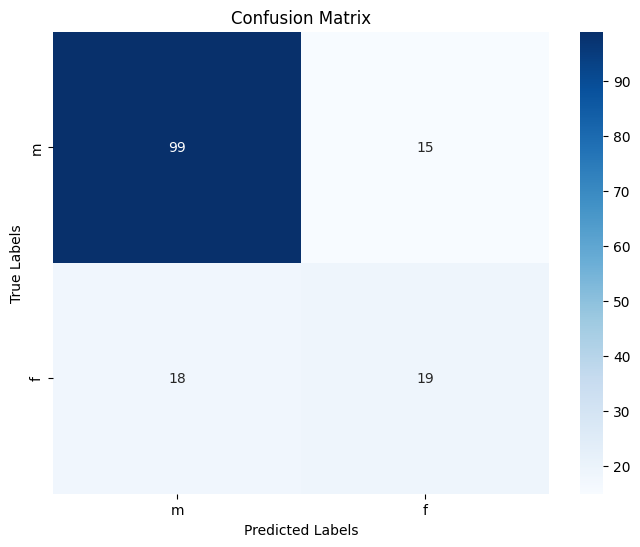

Top 20 words for Male writers:
Male: לאחר: 1.3610
Male: שעות: 1.3436
Male: בגלל: 1.2944
Male: אשתי: 1.2923
Male: עקב: 1.2913
Male: זוכר: 1.2681
Male: כמה: 1.2496
Male: אני: 1.2449
Male: אם: 1.2145
Male: התחיל: 1.1965
Male: לכל: 1.1682
Male: אוהב: 1.1637
Male: מדובר: 1.1604
Male: עליתי: 1.1251
Male: רכב: 1.1241
Male: למה: 1.1072
Male: מגיע: 1.1013
Male: איזה: 1.0978
Male: הרי: 1.0934
Male: בת: 1.0808

Top 20 words for Female writers:
Female: נשאר: -1.0909
Female: נחמד: -1.0953
Female: ולא: -1.1028
Female: אבל: -1.1129
Female: עובדים: -1.1180
Female: יהיה: -1.1380
Female: שום: -1.1537
Female: שמדובר: -1.1666
Female: עוד: -1.1721
Female: חדשים: -1.1769
Female: בסדר: -1.1891
Female: בן: -1.2136
Female: חברה: -1.2421
Female: חשבתי: -1.3256
Female: שלו: -1.3601
Female: הציוד: -1.3992
Female: יכולה: -1.4735
Female: היינו: -1.7499
Female: צריכה: -1.7819
Female: יודעת: -2.1292


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,
         6.,  8.,  4.,  6.,  9.,  9.,  9., 19., 24., 21., 37., 35., 39.,
        42., 50., 49., 57., 61., 62., 54., 51., 48., 53., 36., 46., 25.,
        30., 24., 19., 15., 10., 11.,  4.,  6.,  5.,  3.,  5.]),
 array([-2.12922371, -2.05941857, -1.98961344, -1.9198083 , -1.85000317,
        -1.78019803, -1.7103929 , -1.64058776, -1.57078263, -1.5009775 ,
        -1.43117236, -1.36136723, -1.29156209, -1.22175696, -1.15195182,
        -1.08214669, -1.01234155, -0.94253642, -0.87273129, -0.80292615,
        -0.73312102, -0.66331588, -0.59351075, -0.52370561, -0.45390048,
        -0.38409534, -0.31429021, -0.24448508, -0.17467994, -0.10487481,
        -0.03506967,  0.03473546,  0.1045406 ,  0.17434573,  0.24415087,
         0.313956  ,  0.38376113,  0.45356627,  0.5233714 ,  0.59317654,
         0.66298167,  0.73278681,  0.80259194,  0.87239708,  0.94220221,
         1.01200734,  1.08181248,  1.15161761,  1.22142275,

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

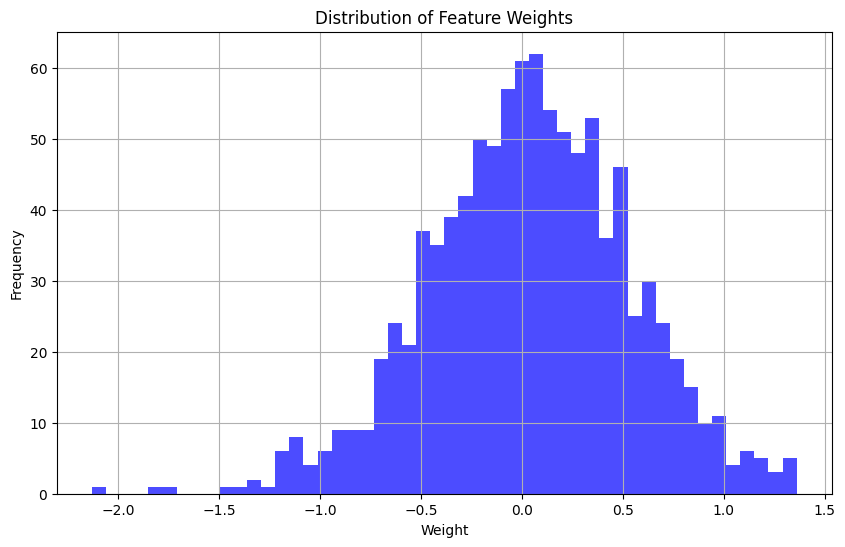

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)
y_pred = perc.predict(x_test_tfidf)

f1_male = f1_score(Y_test, y_pred, pos_label='m')
f1_female = f1_score(Y_test, y_pred, pos_label='f')

print(f"F1-score for Perceptron:")
print(f"  F1-score when male writers are positive class: {f1_male}")
print(f"  F1-score when female writers are positive class: {f1_female}")
average_f1 = (f1_male + f1_female) / 2
print(f"  Average F1-score: {average_f1}")

# Use your custom plot_confusion_matrix function
plot_confusion_matrix(Y_test, y_pred, labels=['m', 'f'])

# Sorting and printing top/bottom words
feature_names = vectorizer.get_feature_names_out()
coefficients = perc.coef_
features_coefficients = dict(zip(feature_names, coefficients[0]))
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

print("Top 20 words for Male writers:")
for feature, coefficient in sorted_features[:20]:
    print(f"Male: {feature}: {coefficient:.4f}")

print("\nTop 20 words for Female writers:")
for feature, coefficient in sorted_features[-20:]:
    print(f"Female: {feature}: {coefficient:.4f}")

# Feature weights histogram
plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()


#### Checking Perceptron with CountVectorizer ####

Perceptron()

F1-score for Perceptron:
  F1-score when male writers are positive class: 0.8389830508474576
  F1-score when female writers are positive class: 0.42424242424242425
  Average F1-score: 0.631612737544941


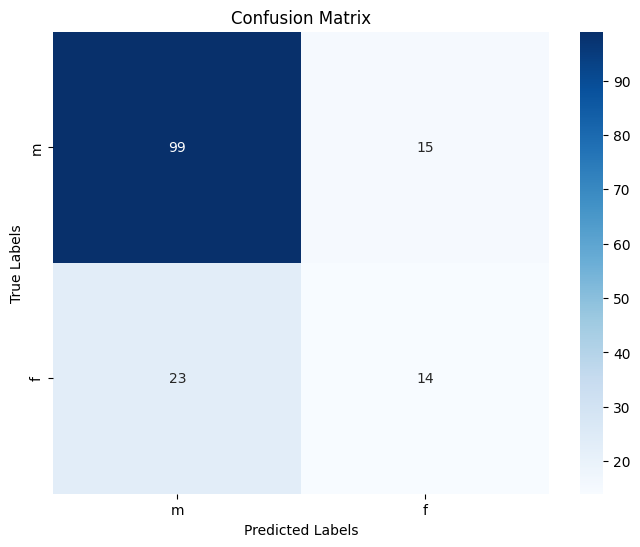

Top-Male 20 words:
למה: 55.0000
שעות: 53.0000
החברים: 50.0000
צריך: 46.0000
אם: 45.0000
עקב: 44.0000
התחיל: 42.0000
אדם: 41.0000
חבר: 41.0000
מספר: 41.0000
בגלל: 40.0000
בכל: 40.0000
יכול: 40.0000
קרה: 40.0000
זוכר: 37.0000
לאחר: 37.0000
אוהב: 36.0000
ביותר: 36.0000
חברים: 36.0000
יודע: 36.0000

Bottom-Female 20 words:
אבל: -37.0000
חשבתי: -37.0000
שלו: -37.0000
עובדים: -38.0000
ראש: -39.0000
חברות: -40.0000
יהיה: -40.0000
ים: -40.0000
האוטו: -41.0000
פעמים: -41.0000
שום: -42.0000
אליה: -43.0000
הציוד: -43.0000
אחת: -45.0000
היינו: -48.0000
יודעת: -53.0000
עוד: -53.0000
הקורונה: -54.0000
יכולה: -58.0000
צריכה: -61.0000


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  1.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  5.,  6.,  5., 11.,
         8.,  8., 22., 11., 18., 33., 26., 19., 57., 49., 42., 53., 66.,
        48., 44., 66., 46., 47., 74., 38., 32., 42., 26., 16., 16., 13.,
        12.,  8.,  5.,  2.,  7.,  1.,  2.,  1.,  1.,  0.,  2.]),
 array([-61.  , -58.68, -56.36, -54.04, -51.72, -49.4 , -47.08, -44.76,
        -42.44, -40.12, -37.8 , -35.48, -33.16, -30.84, -28.52, -26.2 ,
        -23.88, -21.56, -19.24, -16.92, -14.6 , -12.28,  -9.96,  -7.64,
         -5.32,  -3.  ,  -0.68,   1.64,   3.96,   6.28,   8.6 ,  10.92,
         13.24,  15.56,  17.88,  20.2 ,  22.52,  24.84,  27.16,  29.48,
         31.8 ,  34.12,  36.44,  38.76,  41.08,  43.4 ,  45.72,  48.04,
         50.36,  52.68,  55.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

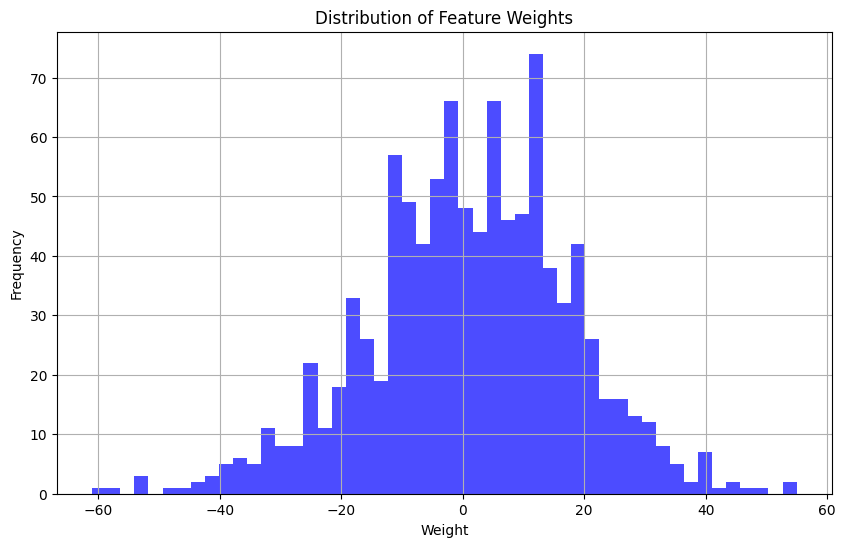

In [51]:

X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=1000)
x_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_count, Y_train)
y_pred = perc.predict(x_test_count)

f1_male = f1_score(Y_test, y_pred, pos_label='m')
f1_female = f1_score(Y_test, y_pred, pos_label='f')

print(f"F1-score for Perceptron:")
print(f"  F1-score when male writers are positive class: {f1_male}")
print(f"  F1-score when female writers are positive class: {f1_female}")
average_f1 = (f1_male + f1_female) / 2
print(f"  Average F1-score: {average_f1}")

# Use your custom plot_confusion_matrix function
plot_confusion_matrix(Y_test, y_pred, labels=['m', 'f'])

feature_names = vectorizer.get_feature_names_out()
coefficients = perc.coef_
features_coefficients = dict(zip(feature_names, coefficients[0]))
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

print("Top-Male 20 words:")
for feature, coefficient in sorted_features[:20]:
    print(f"{feature}: {coefficient:.4f}")

print("\nBottom-Female 20 words:")
for feature, coefficient in sorted_features[-20:]:
    print(f"{feature}: {coefficient:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()


From the models shown above we can conclude the the ML agorithm has a much easier time guessing the males and when it comes to the females its not far from a coin flip

because our results for females are pretty low we wanted to try something to improve them 
we will explain our idea with an analogy 
if i say that i have an unfair coin and i flip it 10 times and in 7 of those i have tails and 3 heads you would be 
inclined to think that the coin is balanced in favor of tails in much the same way we "flip an unbalanced coin"
by using every model accessible to us to get a few results 
now the perceptron model also asignes weight to each column meaning if our guess was 0.4 and not 0.6 it would just
give it a negetive weight 

in our theory that should have helped us predict a more accurate prediction 


KNeighborsClassifier(n_neighbors=3)

KMeans(n_clusters=2, random_state=0)

Perceptron()

LinearSVC()

MLPClassifier()

DecisionTreeClassifier()

PCA(n_components=1)

Perceptron()

F1-score for Male Writers: 0.8776
F1-score for Female Writers: 0.5538
Average F1-score: 0.7157


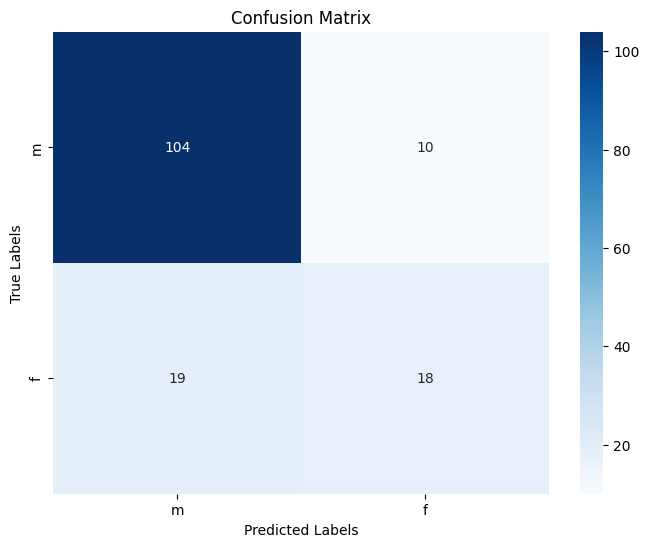

In [52]:

X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)


# Train KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_vectorized, Y_train)
knn_preds = knn_model.predict(X_test_vectorized)

# Train KMeans
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(X_train_vectorized)
kmeans_preds = kmeans_model.predict(X_test_vectorized)

# Train Perceptron
perc_model = Perceptron()
perc_model.fit(x_train_tfidf, Y_train)
perc_preds = perc_model.predict(x_test_tfidf)

# Train LinearSVC
svm_model = LinearSVC()
svm_model.fit(x_train_tfidf, Y_train)
svm_preds = svm_model.predict(x_test_tfidf)

# Train MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(x_train_tfidf, Y_train)
mlp_preds = mlp_model.predict(x_test_tfidf)

# Train DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_tfidf, Y_train)
dt_preds = dt_model.predict(x_test_tfidf)

# Apply PCA
pca = PCA(n_components=1)
pca.fit(x_train_tfidf.toarray())
x_test_pca = pca.transform(x_test_tfidf.toarray())

# Manually encode categorical predictions as numerical values
label_encoder = LabelEncoder()
knn_preds_encoded = label_encoder.fit_transform(knn_preds)
kmeans_preds_encoded = label_encoder.fit_transform(kmeans_preds)
perc_preds_encoded = label_encoder.fit_transform(perc_preds)
svm_preds_encoded = label_encoder.fit_transform(svm_preds)
mlp_preds_encoded = label_encoder.fit_transform(mlp_preds)
dt_preds_encoded = label_encoder.fit_transform(dt_preds)

# Combine predictions and PCA feature
combined_features = np.column_stack((
    knn_preds_encoded,
    kmeans_preds_encoded,
    perc_preds_encoded,
    svm_preds_encoded,
    mlp_preds_encoded,
    dt_preds_encoded,
    x_test_pca
))

# Train another ML model using the combined predictions as features
combined_model = Perceptron()

# Prepare target
combined_target = label_encoder.fit_transform(Y_test)

# Train the combined model
combined_model.fit(combined_features, combined_target)

# Make predictions using the combined model
combined_preds_encoded = combined_model.predict(combined_features)

# Decode the predictions back to original class labels
combined_preds = label_encoder.inverse_transform(combined_preds_encoded)

# Calculate F1-score for the combined approach
f1_combined = f1_score(Y_test, combined_preds, average='weighted')

#print(f"F1-score for Combined Approach: {f1_combined:.4f}")

f1_male = f1_score(Y_test, combined_preds, pos_label='m', average='binary')

# Calculate F1-score for females
f1_female = f1_score(Y_test, combined_preds, pos_label='f', average='binary')

# Calculate average F1-score
avg_f1 = (f1_male + f1_female) / 2

print(f"F1-score for Male Writers: {f1_male:.4f}")
print(f"F1-score for Female Writers: {f1_female:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")

#plot_confusion_matrix(Y_test, combined_preds, title='Combined Confusion Matrix')
plot_confusion_matrix(Y_test, combined_preds, labels=['m', 'f'])



In practice it improved our prediction for males and made our predictios for females no existant.

As we can see in the confusion matrix it rarely tried to guess that a result is a female.
We can see the combined aproach doesnt help us much either, the issue seems to be that most of our data is filled with males and therefor potentially giving them preference or doesnt represnt our data good enough to make an accurate assumption.

#### Lets try to use cross_val_score and see if we can get anything decent ####

SGDClassifier()

Fold 1 - Macro F1-score (Male): 0.5496 | Macro F1-score (Female): 0.5496


SGDClassifier()

Fold 2 - Macro F1-score (Male): 0.6588 | Macro F1-score (Female): 0.6588


SGDClassifier()

Fold 3 - Macro F1-score (Male): 0.6104 | Macro F1-score (Female): 0.6104


SGDClassifier()

Fold 4 - Macro F1-score (Male): 0.7222 | Macro F1-score (Female): 0.7222


SGDClassifier()

Fold 5 - Macro F1-score (Male): 0.5807 | Macro F1-score (Female): 0.5807
Best Average Macro F1-score: 0.7222


SGDClassifier()


Results for Best Model (Full Test Set):
Macro F1-score when male writers are positive class: 0.7026992696093999
Macro F1-score when female writers are positive class: 0.7026992696093999
Average Macro F1-score: 0.7026992696093999


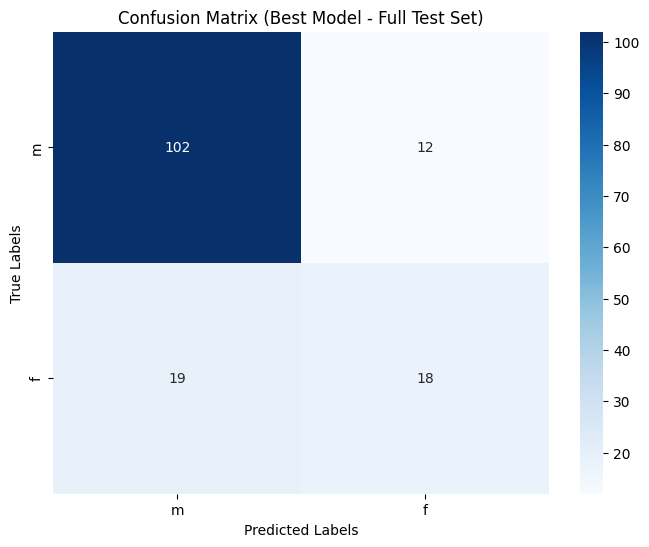

In [56]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

# Initialize SGDClassifier
sgd = SGDClassifier()

# Define macro F1-score as the scoring metric for cross-validation
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Perform cross-validation and track best macro F1-score
best_macro_f1_score = -1  # Initialize with a low value
for fold_idx, (train_indices, val_indices) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(x_train_tfidf, Y_train)):
    x_fold_train, y_fold_train = x_train_tfidf[train_indices], Y_train.iloc[train_indices]
    x_fold_val, y_fold_val = x_train_tfidf[val_indices], Y_train.iloc[val_indices]

    sgd.fit(x_fold_train, y_fold_train)
    y_pred_val = sgd.predict(x_fold_val)
    fold_f1_male = f1_score(y_fold_val, y_pred_val, pos_label='m', average='macro')
    fold_f1_female = f1_score(y_fold_val, y_pred_val, pos_label='f', average='macro')

    print(f"Fold {fold_idx + 1} - Macro F1-score (Male): {fold_f1_male:.4f} | Macro F1-score (Female): {fold_f1_female:.4f}")
    
    fold_macro_f1_score = (fold_f1_male + fold_f1_female) / 2
    
    if fold_macro_f1_score > best_macro_f1_score:
        best_macro_f1_score = fold_macro_f1_score
        best_model = sgd  # Save the best model

print(f"Best Average Macro F1-score: {best_macro_f1_score:.4f}")

# Train the best model on the full training set
best_model.fit(x_train_tfidf, Y_train)

# Predict on the test set using the best model
y_pred_best = best_model.predict(x_test_tfidf)

# Calculate F1-scores for the full test set
f1_male_best = f1_score(Y_test, y_pred_best, pos_label='m', average='macro')
f1_female_best = f1_score(Y_test, y_pred_best, pos_label='f', average='macro')
average_f1_best = (f1_male_best + f1_female_best) / 2

print("\nResults for Best Model (Full Test Set):")
print(f"Macro F1-score when male writers are positive class: {f1_male_best}")
print(f"Macro F1-score when female writers are positive class: {f1_female_best}")
print(f"Average Macro F1-score: {average_f1_best}")

# Use your custom plot_confusion_matrix function for the best model on the full test set
plot_confusion_matrix(Y_test, y_pred_best, labels=['m', 'f'], title='Confusion Matrix (Best Model - Full Test Set)')


Now lets train the model on the whole train data and try to predict on the test file the gender column.

In [57]:
import pickle

# Load the saved best model
best_model_filename = 'best_model.pkl'
with open(best_model_filename, 'rb') as model_file:
    best_model = pickle.load(model_file)

# Load the annotated_corpus_for_train.csv file
train_data = pd.read_csv('annotated_corpus_for_train.csv')

# TF-IDF vectorization for training data using the tokenized text data from final_stories
vectorizer = TfidfVectorizer(max_features=1000)
train_text_tfidf = vectorizer.fit_transform(final_stories)

# Train the best model on the full training data
best_model.fit(train_text_tfidf, train_data['gender'])

# Load the corpus_for_test.csv file
test_data = pd.read_csv('corpus_for_test.csv')

# TF-IDF vectorization for test data using the same tokenization process
test_text_data = test_data['story']  # Replace with the actual column name
test_text_tfidf = vectorizer.transform(test_text_data)

# Predict gender labels using the trained best model
predicted_genders = best_model.predict(test_text_tfidf)

# Create a DataFrame with the predicted results
df_predicted = pd.DataFrame({
    'test_example_id': test_data['test_example_id'],  # Replace with the actual column name
    'predicted_category': predicted_genders
})

# Save the predicted results to classification_results.csv
df_predicted.to_csv('classification_results.csv', index=False)
print("Predictions saved to classification_results.csv")


SGDClassifier()

Predictions saved to classification_results.csv


#### Lets use the following model on our next CSV file to see how accurate the outcome is ####

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following: